In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn

In [2]:
mavenn.__path__

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local/mavenn']

In [3]:
# load data
gb1_df = mavenn.load_example(which='training_data',name='gb1')

In [4]:
gb1_df

,input_ct,selected_ct,hamming_dist,training_set,y,dy,x
0,1759616.0,3041819.0,0,True,0.000000,0.001366,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
1,14663.0,38476.0,1,True,0.602044,0.014001,AYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
2,13001.0,23023.0,1,True,0.034732,0.015827,CYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
3,11488.0,18085.0,1,True,-0.135053,0.017212,DYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
4,9501.0,15629.0,1,True,-0.071659,0.018767,EYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
...,...,...,...,...,...,...,...
536956,130.0,9.0,2,True,-4.501168,0.473313,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
536957,151.0,30.0,2,True,-3.083405,0.284313,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
536959,317.0,84.0,2,True,-2.693165,0.176159,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...
536960,335.0,77.0,2,True,-2.896589,0.181325,QYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDD...


In [5]:
x_train = gb1_df['x'].values
y_train = gb1_df['y'].values

In [6]:
# load mavenn's GE model
gpmap_type = 'additive'
ge_noise_model_type = 'Gaussian'
GER = mavenn.Model(regression_type='GE',
                   x=x_train,
                   y=y_train,
                   gpmap_type=gpmap_type,
                   ge_noise_model_type=ge_noise_model_type,
                   ge_nonlinearity_monotonic=True,
                   alphabet='protein',
                  theta_regularization=0.0005,
                  eta_regularization=0.0005,
                   ge_heteroskedasticity_order=0,
                   ohe_batch_size=420000)

In [7]:
GER.model.model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay [(None, 1101)]       0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 1100)         0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
phi (Dense)                     (None, 1)            1101        Sequence_only[0][0]              
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           100         phi[0][0]                        
_______________________________________________________________________________________

In [8]:
GER.fit(epochs=40,
        #optimizer='Adam',
        learning_rate=0.0005,
        early_stopping=False,
        #early_stopping_patience=15,
        validation_split=0.1,
        verbose=True)

Epoch 1/40
7735/7735 [==============================] - 8s 977us/step - loss: 214.3336 - val_loss: 135.6266
Epoch 2/40
7735/7735 [==============================] - 7s 938us/step - loss: 128.7868 - val_loss: 127.4827
Epoch 3/40
7735/7735 [==============================] - 8s 1ms/step - loss: 88.7949 - val_loss: 66.1559
Epoch 4/40
7735/7735 [==============================] - 8s 979us/step - loss: 60.3375 - val_loss: 60.6890
Epoch 5/40
7735/7735 [==============================] - 8s 995us/step - loss: 59.5970 - val_loss: 59.5630
Epoch 6/40
7735/7735 [==============================] - 8s 1ms/step - loss: 59.5253 - val_loss: 60.5053
Epoch 7/40
7735/7735 [==============================] - 7s 945us/step - loss: 59.5236 - val_loss: 59.2460
Epoch 8/40
7735/7735 [==============================] - 8s 1ms/step - loss: 59.4967 - val_loss: 59.6944
Epoch 9/40
7735/7735 [==============================] - 7s 968us/step - loss: 59.4965 - val_loss: 59.2880
Epoch 10/40
7735/7735 [=========================

In [9]:
loss_history = GER.model.history

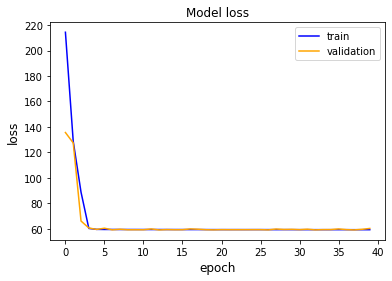

In [10]:
plt.plot(loss_history.history['loss'], color='blue')
plt.plot(loss_history.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])

In [11]:
# load data
gb1_df_test = mavenn.load_example(which='test_data',name='gb1')

x_test = gb1_df_test['x'].values
y_test = gb1_df_test['y'].values

In [12]:
yhat = GER.x_to_yhat(x_test)
phi = GER.x_to_phi(x_test)


In [13]:
GER.get_nn().summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay [(None, 1101)]       0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1100)         0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
phiPrime (Dense)                (None, 1)            1101        lambda[0][0]                     
__________________________________________________________________________________________________
phi (Dense)                     (None, 1)            2           phiPrime[0][0]                   
_______________________________________________________________________________________

In [14]:
len(GER.get_nn().layers)

9

In [15]:
phi_range = np.linspace(min(phi),max(phi),1000)

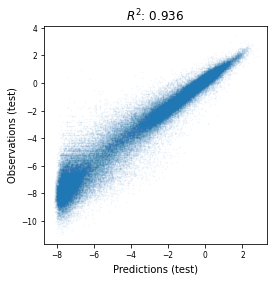

In [16]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(yhat.ravel(),y_test)[0][1]**2
plt.scatter(yhat,y_test,s=0.5,alpha=0.04)
plt.xlabel('Predictions (test)')
plt.ylabel('Observations (test)')
plt.title('$R^2$: '+str(Rsq)[0:5])
plt.tick_params(labelsize=7.5)
plt.show()

In [17]:
y_hat_GE = GER.phi_to_yhat(phi_range)

In [18]:
qs = GER.yhat_to_yq(y_hat_GE,np.array([0.16,0.84]))

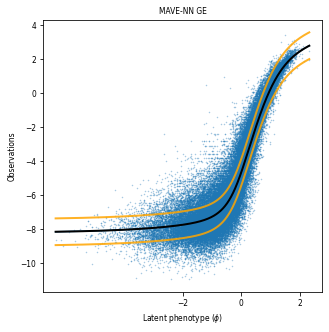

In [19]:


plt.figure(figsize=(5,5))
phi_range = np.linspace(min(phi),max(phi),1000)
plt.plot(phi_range,GER.phi_to_yhat(phi_range))
plt.scatter(phi,y_test,s=0.25, alpha=0.4, label='Observations')
plt.plot(phi_range,GER.phi_to_yhat(phi_range),lw=2,label='$\hat{y}$',alpha=1.0,color='black')

plt.plot(phi_range,qs[:,0],color='orange',lw=2,alpha=0.85,label='$\hat{y} \pm \sigma(\hat{y})$')
plt.plot(phi_range,qs[:,1],color='orange',lw=2,alpha=0.85)

plt.tick_params(labelsize=7.5)

# leg = plt.legend(fontsize=7,prop={'size': 5})
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
#     #lh.set_sizes([5.0])
      
#plt.ylim(-2,4)
# plt.yticks([-1,0,1,2,3])
plt.xticks([-2,0,2])
plt.ylabel('Observations',fontsize=7.5)
plt.xlabel('Latent phenotype ($\phi$)',fontsize=7.5)
#plt.title(noise_model+' Likelihood',fontsize=7.5)
plt.title('MAVE-NN GE',fontsize=7.5)
#plt.savefig('mpsa_additive_gaussian.png',bbox_inches='tight',dpi=600)
plt.show()


In [20]:
#GER.save('gaussian_GB1_model_ho_2')